In [0]:
# from google.colab import files
# files.upload()

In [2]:
%%time
from __future__ import absolute_import, division, unicode_literals, print_function
%load_ext autoreload
%load_ext tensorboard
%autoreload 2

import cv2
import pathlib
from scipy import stats
from tqdm import tqdm_notebook, tqdm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={"figure.figsize":(12,10)})
sns.set_style("whitegrid")
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import os
import gc
gc.enable()
import sys
import csv
import time
import json
import glob
import datetime
import random
import subprocess
import functools
import multiprocessing
from multiprocessing import Pool

np.set_printoptions(precision=3, suppress=True)

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

try:
  %tensorflow_version 2.x
  print("TensorFlow 2.0 rc is up and running.")
except:
  print("TensorFlow 2.0 rc error.!")

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model

import sklearn
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.ensemble import *
from sklearn.preprocessing import *

print("TensorFlow version: ",tf.__version__)
print("Exeuting eagerly: ",tf.executing_eagerly())
print("GPU is","available." if tf.test.is_gpu_available() else "unavailable.")

from IPython.display import display, clear_output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

def seed_everything(seed):
  try:
    tf.random.set_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
    print("Seeding intialized.")
  except:
    print("Seeding faled.")

seed_everything(999)
print(os.listdir())
print("Done.!")

TensorFlow 2.x selected.
TensorFlow 2.0 rc is up and running.
TensorFlow version:  2.0.0-rc1
Exeuting eagerly:  True
GPU is available.
Seeding intialized.
['.config', 'dengue_labels_train.csv', 'dengue_features_train.csv', 'model.png', 'dengue_features_test.csv', 'sample_data']
Done.!
CPU times: user 2.06 s, sys: 306 ms, total: 2.36 s
Wall time: 2.4 s


In [3]:
%%time
csv_files = glob.glob("**.csv")
print("There are total {} csv files: ".format(len(csv_files)))
print("The csv files are: {}".format(csv_files))

There are total 3 csv files: 
The csv files are: ['dengue_labels_train.csv', 'dengue_features_train.csv', 'dengue_features_test.csv']
CPU times: user 127 µs, sys: 2.02 ms, total: 2.15 ms
Wall time: 1.73 ms


In [4]:
%%time
def load_data(file):
    return pd.read_csv(file)

with multiprocessing.Pool() as pool:
    train_labels, train_features, test_features = pool.map(load_data, csv_files)

CPU times: user 16 ms, sys: 23 ms, total: 39 ms
Wall time: 147 ms


In [0]:
def display_all(df):
  with pd.option_context("display.max_rows",1000,"display.max_columns",50):
    display(df)

### display data

In [6]:
display_all(train_features)
display_all(test_features)
display_all(train_labels)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
5,sj,1990,23,1990-06-04,NaN,0.174850,0.254314,0.181743,9.58,299.630000,299.764286,295.851429,302.4,298.1,26.49,79.891429,9.58,17.212857,2.100000,28.114286,6.942857,34.4,23.9,39.1
6,sj,1990,24,1990-06-11,0.112900,0.092800,0.205071,0.210271,3.48,299.207143,299.221429,295.865714,301.3,297.7,38.60,82.000000,3.48,17.234286,2.042857,27.414286,6.771429,32.2,23.3,29.7
7,sj,1990,25,1990-06-18,0.072500,0.072500,0.151471,0.133029,151.12,299.591429,299.528571,296.531429,300.6,298.4,30.00,83.375714,151.12,17.977143,1.571429,28.371429,7.685714,33.9,22.8,21.1
8,sj,1990,26,1990-06-25,0.102450,0.146175,0.125571,0.123600,19.32,299.578571,299.557143,296.378571,302.1,297.7,37.51,82.768571,19.32,17.790000,1.885714,28.328571,7.385714,33.9,22.8,21.1
9,sj,1990,27,1990-07-02,NaN,0.121550,0.160683,0.202567,14.41,300.154286,300.278571,296.651429,302.3,298.7,28.40,81.281429,14.41,18.071429,2.014286,28.328571,6.514286,33.9,24.4,1.1


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.018900,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,301.1,296.4,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.018000,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,300.8,296.7,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.001500,NaN,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,302.2,296.4,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,303.0,296.9,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.056800,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,302.3,297.3,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1
5,sj,2008,23,2008-06-03,-0.044000,-0.030467,0.132000,0.083529,71.17,299.768571,299.728571,295.314286,301.9,297.6,22.55,76.557143,71.17,16.667143,2.857143,28.000000,5.171429,32.8,25.0,27.7
6,sj,2008,24,2008-06-10,-0.044300,-0.024925,0.132271,0.159157,48.99,300.062857,300.007143,295.650000,302.4,297.5,13.10,76.844286,48.99,17.010000,3.157143,27.400000,6.042857,31.1,23.3,91.7
7,sj,2008,25,2008-06-17,NaN,0.082150,0.144371,0.116729,30.81,300.484286,300.578571,295.997143,303.5,297.5,7.20,76.870000,30.81,17.420000,3.900000,28.757143,6.985714,34.4,24.4,0.3
8,sj,2008,26,2008-06-24,0.010800,0.049900,0.100571,0.117329,8.02,300.601429,300.621429,296.268571,302.5,298.5,17.10,77.395714,8.02,17.678571,2.785714,28.657143,6.242857,32.8,23.9,28.7
9,sj,2008,27,2008-07-01,0.072667,0.106660,0.155429,0.164900,17.52,300.497143,300.528571,296.411429,302.3,298.7,11.90,78.534286,17.52,17.808571,2.228571,28.457143,4.628571,31.1,25.0,2.9


,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6
5,sj,1990,23,2
6,sj,1990,24,4
7,sj,1990,25,5
8,sj,1990,26,10
9,sj,1990,27,6


### Check for null values

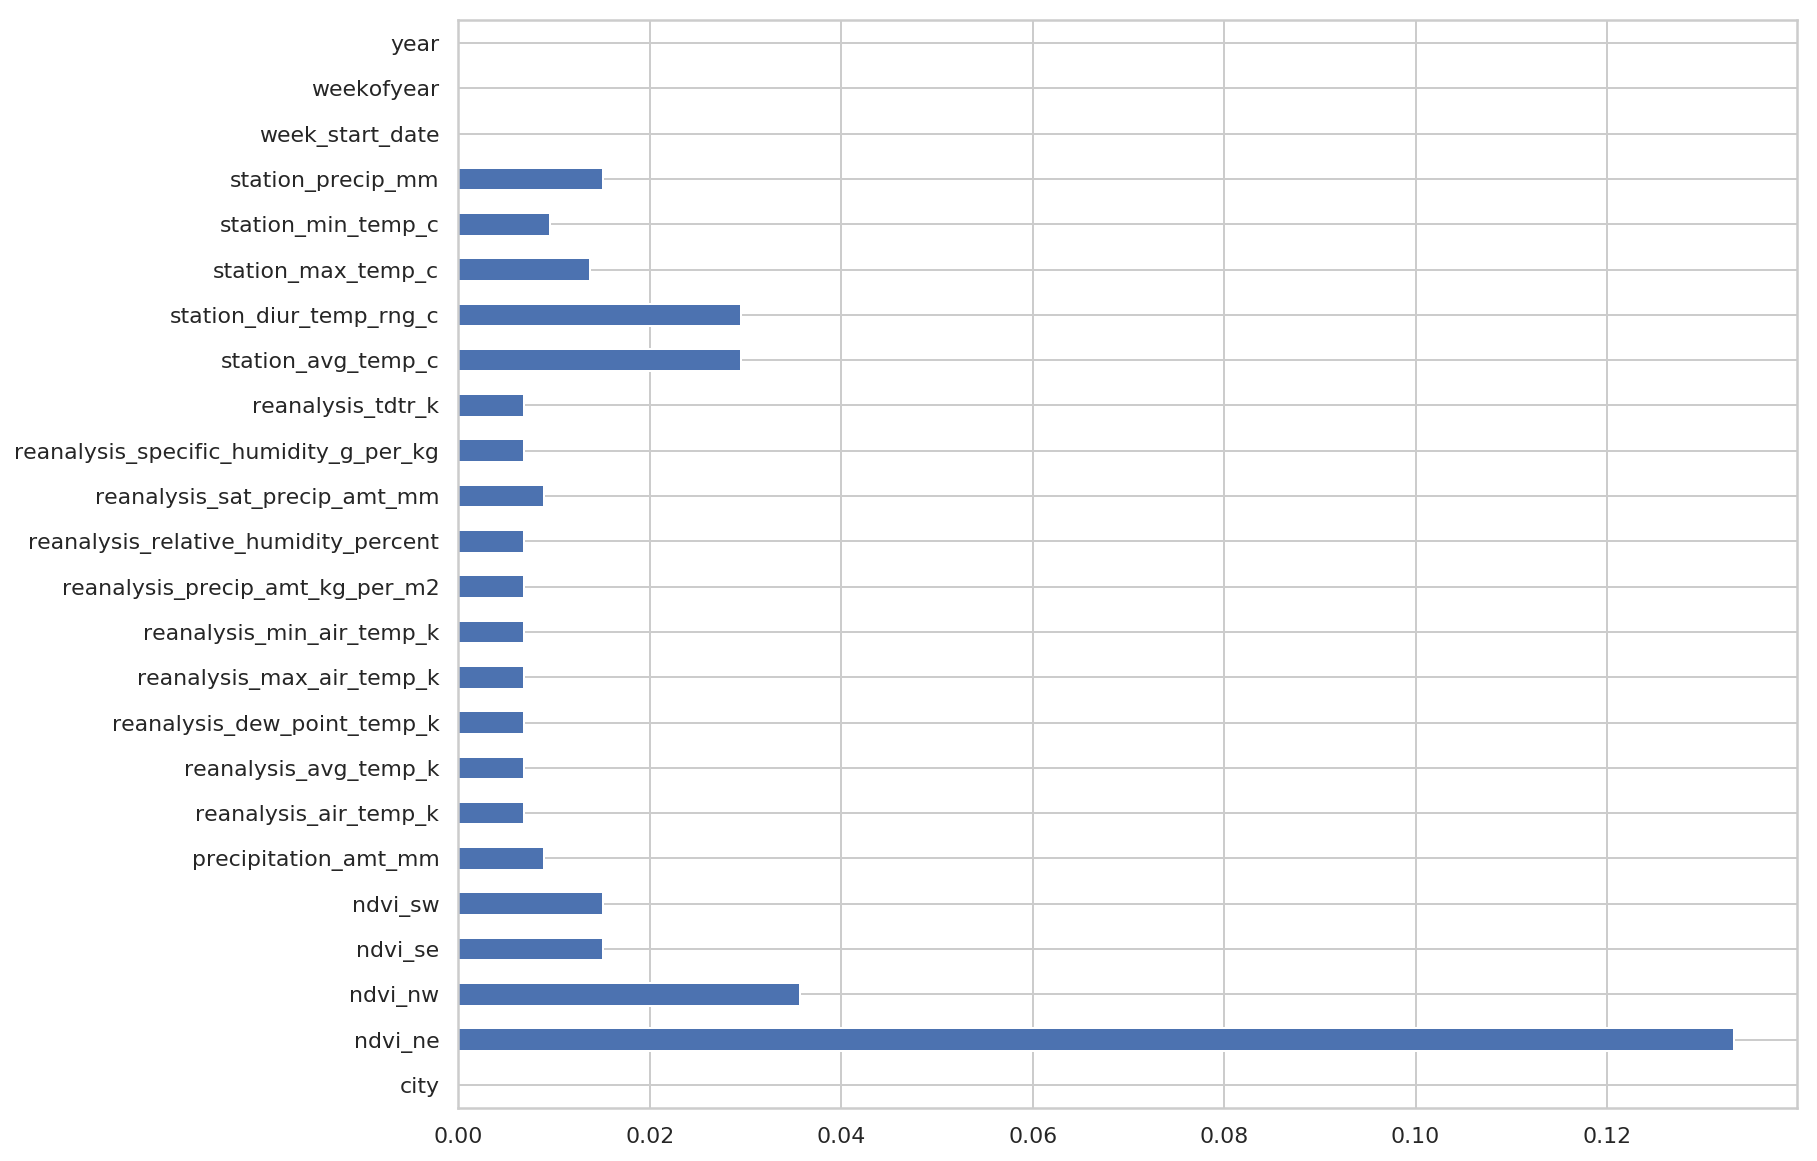

In [7]:
pd.DataFrame(train_features.isnull().sum().sort_index()/len(train_features))[0].plot(kind="barh",figsize=(12,10))

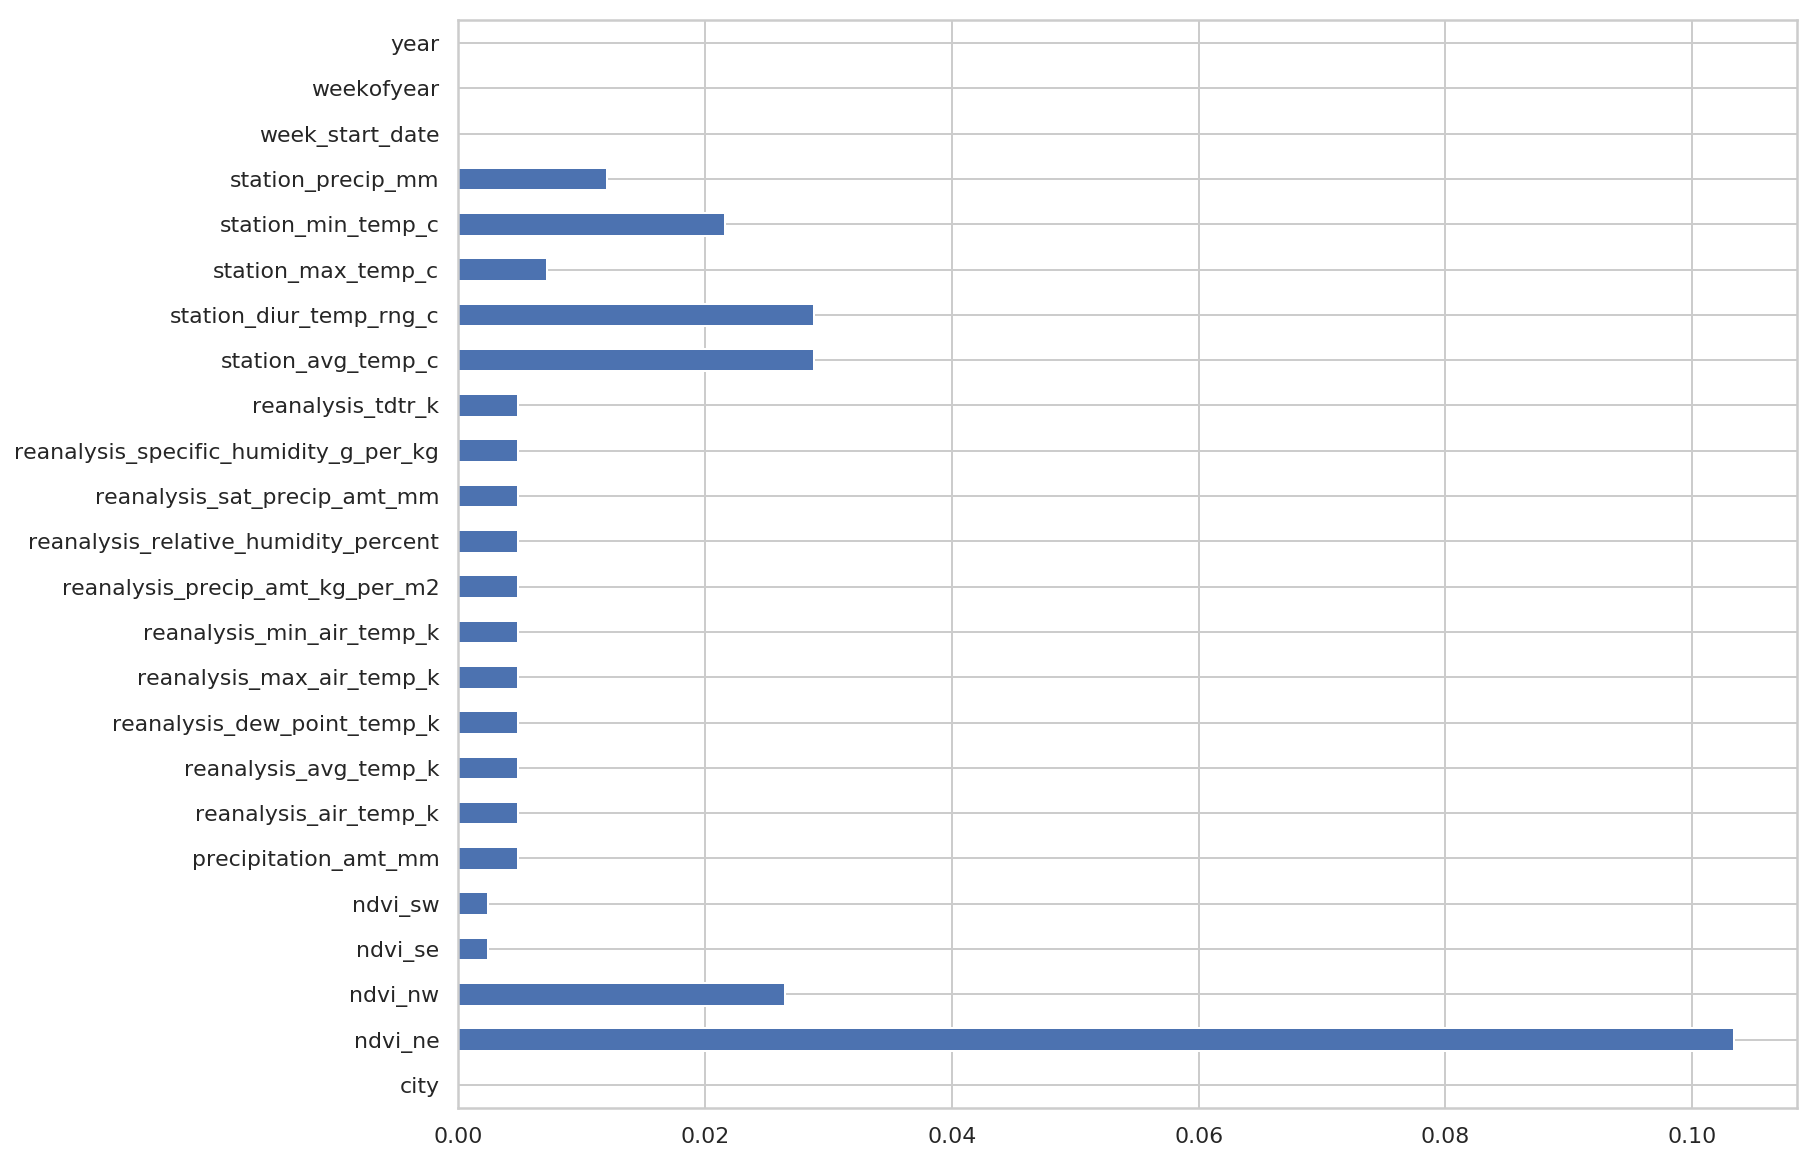

In [8]:
pd.DataFrame(test_features.isnull().sum().sort_index()/len(test_features))[0].plot(kind="barh",figsize=(12,10))

### data description and info

In [9]:
display_all(train_features.describe(include="all").T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
city,1456,2,sj,936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,1456,NaN,NaN,NaN,2001.03,5.40831,1990,1997,2002,2005,2010
weekofyear,1456,NaN,NaN,NaN,26.5034,15.0194,1,13.75,26.5,39.25,53
week_start_date,1456,1049,2005-09-17,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ndvi_ne,1262,NaN,NaN,NaN,0.142294,0.140531,-0.40625,0.04495,0.128817,0.248483,0.508357
ndvi_nw,1404,NaN,NaN,NaN,0.130553,0.119999,-0.4561,0.0492167,0.121429,0.2166,0.454429
ndvi_se,1434,NaN,NaN,NaN,0.203783,0.0738597,-0.0155333,0.155087,0.19605,0.248846,0.538314
ndvi_sw,1434,NaN,NaN,NaN,0.202305,0.0839027,-0.0634571,0.144209,0.18945,0.246982,0.546017
precipitation_amt_mm,1443,NaN,NaN,NaN,45.7604,43.7155,0,9.8,38.34,70.235,390.6
reanalysis_air_temp_k,1446,NaN,NaN,NaN,298.702,1.36242,294.636,297.659,298.646,299.834,302.2


In [10]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
city                                     1456 non-null object
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
week_start_date                          1456 non-null object
ndvi_ne                                  1262 non-null float64
ndvi_nw                                  1404 non-null float64
ndvi_se                                  1434 non-null float64
ndvi_sw                                  1434 non-null float64
precipitation_amt_mm                     1443 non-null float64
reanalysis_air_temp_k                    1446 non-null float64
reanalysis_avg_temp_k                    1446 non-null float64
reanalysis_dew_point_temp_k              1446 non-null float64
reanalysis_max_air_temp_k                1446 non-null float64
reanalysis_min_air_temp_k                1446 non-null float64
reanalysis_precip

In [11]:
train_features.dtypes

city                                      object
year                                       int64
weekofyear                                 int64
week_start_date                           object
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rn

In [12]:
display_all(test_features.describe(include="all").T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
city,416,2,sj,260,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,416,NaN,NaN,NaN,2010.77,1.43484,2008,2010,2011,2012,2013
weekofyear,416,NaN,NaN,NaN,26.4399,14.9783,1,13.75,26,39,53
week_start_date,416,269,2011-12-03,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ndvi_ne,373,NaN,NaN,NaN,0.12605,0.164353,-0.4634,-0.0015,0.1101,0.263329,0.5004
ndvi_nw,405,NaN,NaN,NaN,0.126803,0.14142,-0.2118,0.015975,0.0887,0.2424,0.649
ndvi_se,415,NaN,NaN,NaN,0.207702,0.0791019,0.0062,0.14867,0.204171,0.254871,0.453043
ndvi_sw,415,NaN,NaN,NaN,0.201721,0.0920276,-0.0146714,0.134079,0.186471,0.253243,0.529043
precipitation_amt_mm,414,NaN,NaN,NaN,38.3543,35.1711,0,8.175,31.455,57.7725,169.34
reanalysis_air_temp_k,414,NaN,NaN,NaN,298.818,1.4695,294.554,297.751,298.547,300.24,301.936


In [13]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 24 columns):
city                                     416 non-null object
year                                     416 non-null int64
weekofyear                               416 non-null int64
week_start_date                          416 non-null object
ndvi_ne                                  373 non-null float64
ndvi_nw                                  405 non-null float64
ndvi_se                                  415 non-null float64
ndvi_sw                                  415 non-null float64
precipitation_amt_mm                     414 non-null float64
reanalysis_air_temp_k                    414 non-null float64
reanalysis_avg_temp_k                    414 non-null float64
reanalysis_dew_point_temp_k              414 non-null float64
reanalysis_max_air_temp_k                414 non-null float64
reanalysis_min_air_temp_k                414 non-null float64
reanalysis_precip_amt_kg_per_m2  

In [14]:
test_features.dtypes

city                                      object
year                                       int64
weekofyear                                 int64
week_start_date                           object
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rn

### checking memory usage and total records

In [15]:
print("Total memory usage by {} is : {:.2}MB".format(csv_files[0],train_features.memory_usage().sum()/1024**2))
print("Total memory usage by {} is : {:.2}MB".format(csv_files[1],train_labels.memory_usage().sum()/1024**2))
print("Total memory usage by {} is : {:.2}MB".format(csv_files[2],test_features.memory_usage().sum()/1024**2))

Total memory usage by dengue_labels_train.csv is : 0.27MB
Total memory usage by dengue_features_train.csv is : 0.045MB
Total memory usage by dengue_features_test.csv is : 0.076MB


In [16]:
print("Train features shape: ", train_features.shape)
print("Train labels shape: ", train_labels.shape)
print("Test features shape: ", test_features.shape)

Train features shape:  (1456, 24)
Train labels shape:  (1456, 4)
Test features shape:  (416, 24)


### very simple preprocessing and feature engineering

In [17]:
print("Before dropping: ", len(train_features.columns))
threshold = 0.3

#Dropping columns with missing value rate higher than threshold
train_features = train_features[train_features.columns[train_features.isnull().mean() < threshold]]
print("Afer dropping: ",len(train_features.columns))

Before dropping:  24
Afer dropping:  24


In [0]:
# filling nan values
numeric_columns = [i for i in train_features.columns if train_features[i].dtype=="float64"]
train_features[numeric_columns] = train_features[numeric_columns].fillna(999)

In [19]:
train_features.head(2)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.1226,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.1699,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6


In [20]:
## one - hot encoding
encoded_columns = pd.get_dummies(train_features['city'])
train_features = train_features.join(encoded_columns).drop('city', axis=1)
train_features.head(2)

,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,iq,sj
0,1990,18,1990-04-30,0.1226,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,0,1
1,1990,19,1990-05-07,0.1699,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,0,1


In [21]:
# extracting date related features
#Transform string to date
train_features['week_start_date'] = pd.to_datetime(train_features.week_start_date, format="%Y-%m-%d")

#Extracting Month
train_features['month'] = train_features['week_start_date'].dt.month

#Extracting and encoding the weekday name of the date
train_features['day_name'] = train_features['week_start_date'].dt.day_name()
encoded_columns = pd.get_dummies(train_features['day_name'])
train_features = train_features.join(encoded_columns).drop('day_name', axis=1)
train_features.head(2)

,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,iq,sj,month,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1990,18,1990-04-30,0.1226,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,0,1,4,0,1,0,0,0,0,0
1,1990,19,1990-05-07,0.1699,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,0,1,5,0,1,0,0,0,0,0


In [22]:
# feature scaling
sc = StandardScaler()
train_features[numeric_columns] = sc.fit_transform(train_features[numeric_columns])
train_features.head(2)

,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,iq,sj,month,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1990,18,1990-04-30,-0.392135,-0.192595,-0.123905,-0.124064,-0.419917,-0.102652,-0.108790,-0.131841,-0.146069,-0.079969,-0.163311,-0.198450,-0.419917,-0.116836,-0.110770,-0.185035,-0.181343,-0.145126,-0.120568,-0.299780,0,1,4,0,1,0,0,0,0,0
1,1990,19,1990-05-07,-0.391995,-0.192387,-0.124202,-0.124246,-0.315568,-0.091614,-0.096681,-0.105403,-0.126951,-0.071369,-0.319116,-0.145819,-0.315568,-0.100074,-0.113899,-0.177307,-0.184494,-0.124685,-0.097493,-0.358425,0,1,5,0,1,0,0,0,0,0


In [23]:
#convert timestamp format back to str
#train_features["week_start_date"] = train_features["week_start_date"].astype("str")

#removing datetime column for brevity
train_features.pop("week_start_date")

0      1990-04-30
1      1990-05-07
2      1990-05-14
3      1990-05-21
4      1990-05-28
5      1990-06-04
6      1990-06-11
7      1990-06-18
8      1990-06-25
9      1990-07-02
10     1990-07-09
11     1990-07-16
12     1990-07-23
13     1990-07-30
14     1990-08-06
15     1990-08-13
16     1990-08-20
17     1990-08-27
18     1990-09-03
19     1990-09-10
20     1990-09-17
21     1990-09-24
22     1990-10-01
23     1990-10-08
24     1990-10-15
25     1990-10-22
26     1990-10-29
27     1990-11-05
28     1990-11-12
29     1990-11-19
          ...    
1426   2009-12-03
1427   2009-12-10
1428   2009-12-17
1429   2009-12-24
1430   2010-01-01
1431   2010-01-08
1432   2010-01-15
1433   2010-01-22
1434   2010-01-29
1435   2010-02-05
1436   2010-02-12
1437   2010-02-19
1438   2010-02-26
1439   2010-03-05
1440   2010-03-12
1441   2010-03-19
1442   2010-03-26
1443   2010-04-02
1444   2010-04-09
1445   2010-04-16
1446   2010-04-23
1447   2010-04-30
1448   2010-05-07
1449   2010-05-14
1450   201

In [24]:
train_features.head(2)

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,iq,sj,month,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1990,18,-0.392135,-0.192595,-0.123905,-0.124064,-0.419917,-0.102652,-0.108790,-0.131841,-0.146069,-0.079969,-0.163311,-0.198450,-0.419917,-0.116836,-0.110770,-0.185035,-0.181343,-0.145126,-0.120568,-0.299780,0,1,4,0,1,0,0,0,0,0
1,1990,19,-0.391995,-0.192387,-0.124202,-0.124246,-0.315568,-0.091614,-0.096681,-0.105403,-0.126951,-0.071369,-0.319116,-0.145819,-0.315568,-0.100074,-0.113899,-0.177307,-0.184494,-0.124685,-0.097493,-0.358425,0,1,5,0,1,0,0,0,0,0


In [25]:
X = train_features.copy()
y = train_labels.pop("total_cases")

print(X.head(2))
print(y.head(2))

gc.collect()

   year  weekofyear   ndvi_ne   ndvi_nw  ...  Sunday  Thursday  Tuesday  Wednesday
0  1990          18 -0.392135 -0.192595  ...       0         0        0          0
1  1990          19 -0.391995 -0.192387  ...       0         0        0          0

[2 rows x 32 columns]
0    4
1    5
Name: total_cases, dtype: int64


441

### Creating a predictive model from tensorflow and keras

In [0]:
def create_model():
  model = tf.keras.Sequential([
                               layers.Dense(256,activation=tf.nn.relu,use_bias=True,kernel_initializer="he_uniform",kernel_regularizer=keras.regularizers.l2(0.001),input_shape=[len(X.keys())]),
                               layers.BatchNormalization(),
                               layers.Dropout(0.4),
                               layers.Dense(128,activation=tf.nn.relu,use_bias=True,kernel_initializer="he_uniform",kernel_regularizer=keras.regularizers.l2(0.001)),
                               layers.BatchNormalization(),
                               layers.Dropout(0.4),
                               layers.Dense(64,activation=tf.nn.relu,kernel_initializer="he_uniform",kernel_regularizer=keras.regularizers.l2(0.001),use_bias=True),
                               layers.BatchNormalization(),
                               layers.Dropout(0.4),
                               layers.Dense(1)
  ])

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss="mean_squared_error",metrics=["mean_absolute_error","mean_squared_error"])

  model.summary()

  return model

In [0]:
checkpoint = tf.keras.callbacks.ModelCheckpoint("model_regressor.h5",monitor="val_loss",verbose=1,save_best_only=True,mode="auto")
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",factor=0.3,patience=5,verbose=1,mode="auto",min_lr=0.000001)
# logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
# tensorboard = tf.keras.callbacks.TensorBoard(log_dir=logdir,histogram_freq=1)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",verbose=1,mode="auto", patience=40)

In [0]:
class PlotLearning(tf.keras.callbacks.Callback):
  def on_train_begin(self, logs={}):
    self.i = 0
    self.x = []
    self.loss = []
    self.val_loss = []
    self.mae = []
    self.val_mae = []
    self.fig = plt.figure()
    self.logs = []

  def on_epoch_end(self, epoch, logs={}):
      
    self.logs.append(logs)
    self.x.append(self.i)
    self.loss.append(logs.get('loss'))
    self.mae.append(logs.get('mean_absolute_error'))
    self.val_loss.append(logs.get('val_loss'))        
    self.val_mae.append(logs.get('val_mean_absolute_error'))
    self.i += 1
    f, ax = plt.subplots(1, 2, figsize=(18,6), sharex=True)
    ax = ax.flatten()
    clear_output(wait=True)

    ax[0].plot(self.x, self.loss, label="Mean Squared Error", lw=2)
    ax[0].plot(self.x, self.val_loss, label="Val Mean Squared Error")
    ax[0].legend()
    ax[0].grid(True)
    ax[1].plot(self.x, self.mae, label="Mean Absolute Error", lw=2)
    ax[1].plot(self.x, self.val_mae, label="Val Mean Absolute Error")
    ax[1].legend()
    ax[1].grid(True)
      
    plt.show();
        
plotLoss = PlotLearning()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 256)               8448      
_________________________________________________________________
batch_normalization_21 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_21 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_22 (Batc (None, 128)               512       
_________________________________________________________________
dropout_22 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 64)               

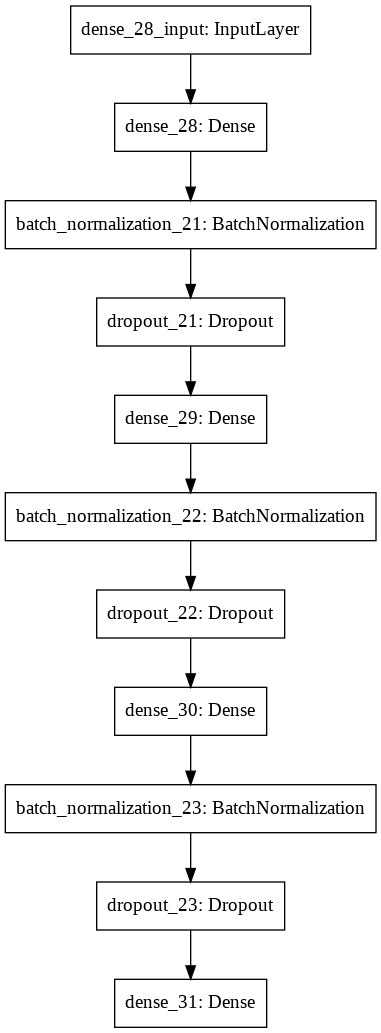

In [74]:
regressor = create_model()
plot_model(regressor)

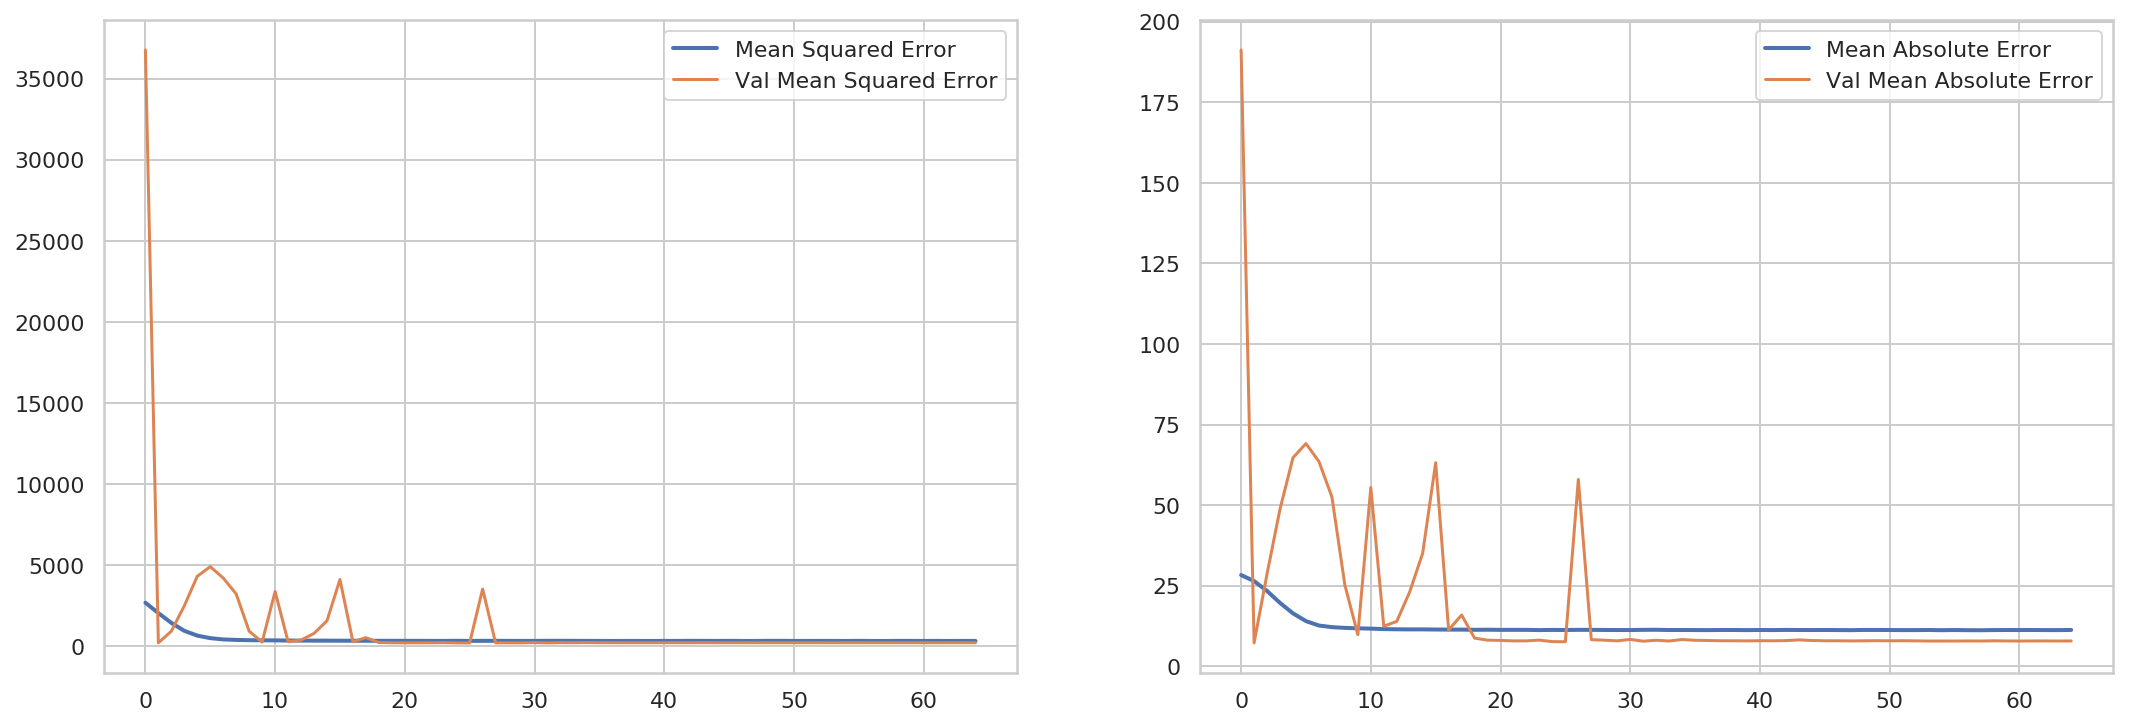


Epoch 00065: val_loss did not improve from 167.58280
91/91 [==============================] - 2s 24ms/step - loss: 311.4387 - mean_absolute_error: 11.2593 - mean_squared_error: 310.5128 - val_loss: 197.2827 - val_mean_absolute_error: 7.8403 - val_mean_squared_error: 196.3567
Epoch 00065: early stopping


In [75]:
EPOCHS = 5000
#%tensorboard --logdir logs
history = regressor.fit(X, 
                    y, 
                    epochs=EPOCHS,
                    steps_per_epoch=X.shape[0]/16,
                    batch_size=16, 
                    validation_split=0.2,
                    verbose=1,
                    callbacks=[reduce_lr,plotLoss,checkpoint,early_stopping])